In [1]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Setting the Seaborn theme for better visualization clarity
sns.set_theme(style="whitegrid")

In [3]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load CSV from URL
url = 'https://raw.githubusercontent.com/egorpol/beat_it/main/csv/dufour_manual.csv'
df = pd.read_csv(url)

# Step 3: Display the first few rows of the DataFrame
display(df)


,peaks_in_sec
0,0.398730
1,2.623492
2,4.863492
3,7.080635
4,9.340952
5,11.553016
6,13.782857
7,16.017778
8,18.245079
9,20.490159


In [4]:
# Extract time points (replace 'peaks_in_sec' with the actual column name if different)
peaks_in_sec = df['peaks_in_sec'].values

# Calculate IOIs (differences between consecutive peaks)
iois = np.diff(peaks_in_sec)

print(iois)

[2.2247619  2.24       2.21714286 2.26031746 2.21206349 2.22984127
 2.23492063 2.22730159 2.24507937 2.21968254 2.24507937 2.22730159
 2.24253968 2.21714286 2.24       2.24761905 2.26031746 2.21460317
 2.24761905 2.22222222 2.23746032 2.22476191 2.24507936 2.21714286
 2.23746032 2.22984127 2.22730159 2.24507937 2.21968254 2.25015873
 2.21968254]


In [17]:
# Calculate the range of IOIs (max - min), which gives the spread between the longest and shortest intervals
range = np.ptp(iois)

# Calculate the mean of the IOIs, representing the average interval between peaks
mean = np.mean(iois)

# Calculate the median of the IOIs, representing the midpoint value of the intervals
median = np.median(iois)

# Calculate the average BPM (beats per minute), where BPM is inversely related to the average IOI (60 seconds / mean IOI)
bpm = 60 / mean

# Calculate the minimum IOI, representing the shortest interval between peaks
min_ioi = np.min(iois)

# Calculate the maximum IOI, representing the longest interval between peaks
max_ioi = np.max(iois)

# Print the results
print("Range of IOIs:", range)
print("Minimum IOI:", min_ioi)
print("Maximum IOI:", max_ioi)
print("Mean of IOIs:", mean)
print("Median of IOIs:", median)
print("Average BPM:", bpm)



Range of IOIs: 0.04825396799999915
Minimum IOI: 2.2120634920000004
Maximum IOI: 2.2603174599999996
Mean of IOIs: 2.2332002048064514
Median of IOIs: 2.2298412700000014
Average BPM: 26.867273194254487


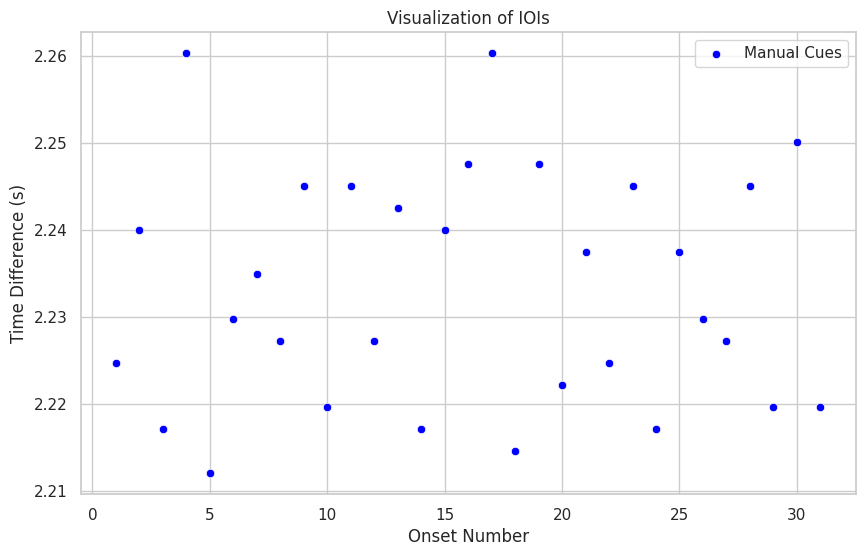

In [18]:
# Create an array of onset numbers to match the IOIs
numbers = np.arange(1, len(iois) + 1)

# Creating a DataFrame to hold onset numbers and IOIs (manual times)
data_plot = pd.DataFrame({"onset_nr": numbers, "time_manual": iois})

# Plotting the manual IOIs
plt.figure(figsize=(10, 6))

# Use scatterplot to visualize IOIs (manual cues)
sns.scatterplot(x="onset_nr", y="time_manual", data=data_plot, label="Manual Cues", marker="o", color="blue")

# Add legend, labels, and title to the plot
plt.legend(loc="upper right")
plt.xlabel("Onset Number")  # X-axis label
plt.ylabel("Time Difference (s)")  # Y-axis label
plt.title("Visualization of IOIs")  # Plot title

# Show the plot
plt.show()

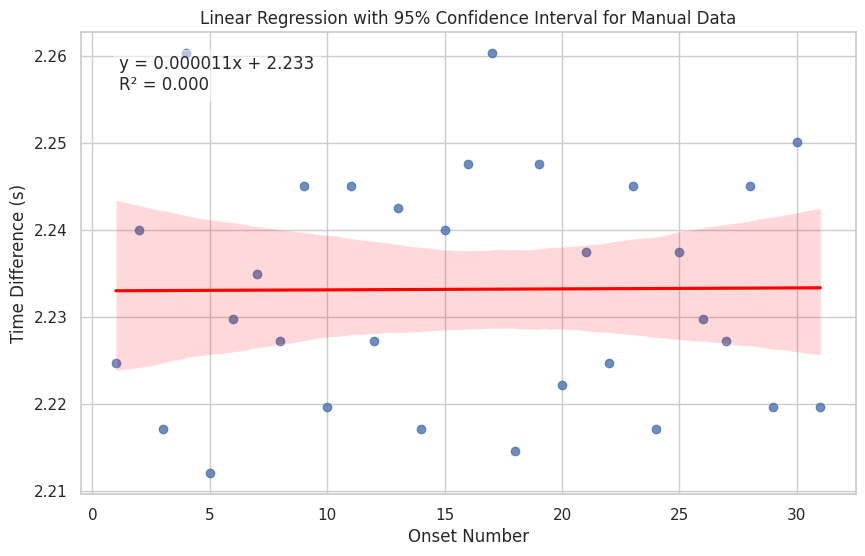

{'Slope': 1.1264722983904362e-05,
 'Intercept': 2.233019969238709,
 'R-squared': 5.7619068638825524e-05,
 'P-value': 0.9676729255262038,
 'Standard Error': 0.00027556616235645183}

In [23]:
from scipy import stats

# Regression Analysis for Manual Data
# Using scipy to get the slope, intercept, r_value, p_value, std_err
slope_manual, intercept_manual, r_value_manual, p_value_manual, std_err_manual = stats.linregress(data_plot['onset_nr'], data_plot['time_manual'])

# Compute the R-squared value for manual data
r_squared_manual = r_value_manual ** 2

# Organize the regression results into a structured format
regression_results_manual = {
    'Slope': slope_manual,
    'Intercept': intercept_manual,
    'R-squared': r_squared_manual,
    'P-value': p_value_manual,
    'Standard Error': std_err_manual
}

# Plotting the regression line with seaborn, including the confidence interval
plt.figure(figsize=(10, 6))

# `ci=95` adds the 95% confidence interval to the regression line
sns.regplot(x="onset_nr", y="time_manual", data=data_plot, line_kws={"color":"red"}, ci=95)

# Plot title and labels
plt.title("Linear Regression with 95% Confidence Interval for Manual Data")
plt.xlabel("Onset Number")
plt.ylabel("Time Difference (s)")

# Displaying the equation of the regression line and R-squared on the plot
plt.text(0.05, 0.95, f'y = {slope_manual:.6f}x + {intercept_manual:.3f}\nR² = {r_squared_manual:.3f}',
         transform=plt.gca().transAxes, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()

# Display the regression results
regression_results_manual


**Key Findings from the Linear Regression:**

- A slope value of approximately **1.13e-05** is extremely small, indicating that the `time_manual` values (the IOIs) change very little as `onset_nr` increases. In practical terms, there’s almost no linear relationship between onset number and the time differences.

- An R-squared value of approximately **0.0000576** is very close to zero, meaning the linear regression model explains almost none of the variability in the `time_manual` values. In other words, there's almost no linear correlation between `onset_nr` and `time_manual`.

- A p-value of **0.9677** is far greater than the typical significance level (e.g., 0.05), meaning that you cannot reject the null hypothesis. There’s no statistically significant linear relationship between the onset number and time intervals (IOIs).

**Conclusion:**  
The regression analysis suggests there’s **no meaningful linear relationship** between the onset number and the IOIs, as shown by the near-zero slope, high p-value, and very low R-squared.
